# Assignment-4

This notebook contains the coding questions to test the proficiency in `Object Oriented Programming` in python.

### Date: 16th May, 2025

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-04-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-04-Dipika_Chopra.ipynb`.
- Upload the solved notebook in the google drive location: https://drive.google.com/drive/folders/14z3q91F8xzPb8Hm-KxNGn-nkKacqB17v?usp=drive_link
<h3><span style="color:red"> Deadline: 31st May, 2025 </span></h3>

## Problem-1

Design a system for a library. Include classes for `Book`, `Patron`, and `Library`.

- The `Book` class should have attributes for title, author, ISBN, and a method `is_available()` that returns `True` if the book is not currently checked out and `False` otherwise. It should also have a method `check_out()` that marks the book as checked out and a method `check_in()` that marks it as available.
- The `Patron` class should have attributes for name and patron ID and a method `borrow_book(book)` that associates a book with the patron.
- The `Library` class should have a collection of `Book` objects and `Patron` objects. It should have methods to `add_book(book)`, `add_patron(patron)`, `lend_book(book, patron)`, and `return_book(book)`. The `lend_book` method should only allow a book to be lent if it's available and the patron exists in the library.


Test your implementation.

In [21]:
class Book:
    def __init__(self, title, author, isbn):
        self.title = title
        self.author = author
        self.isbn = isbn
        self.checked_out = False

    def is_available(self):
        return not self.checked_out

    def check_out(self):
        if self.is_available():
            self.checked_out = True
            return True
        return False

    def check_in(self):
        self.checked_out = False


class Patron:
    def __init__(self, name, patron_id):
        self.name = name
        self.patron_id = patron_id
        self.borrowed_books = []

    def borrow_book(self, book):
        if book.is_available():
            self.borrowed_books.append(book)
            book.check_out()
            return True
        return False


class Library:
    def __init__(self):
        self.books = {}
        self.patrons = {}

    def add_book(self, book):
        self.books[book.isbn] = book

    def add_patron(self, patron):
        self.patrons[patron.patron_id] = patron

    def lend_book(self, isbn, patron_id):
        if isbn not in self.books:
            print("Book not found in library.")
            return False
        if patron_id not in self.patrons:
            print("Patron not found.")
            return False

        book = self.books[isbn]
        patron = self.patrons[patron_id]

        if book.is_available():
            patron.borrow_book(book)
            print(f"{book.title} lent to {patron.name}.")
            return True
        else:
            print(f"{book.title} is not available.")
            return False

    def return_book(self, isbn):
        if isbn in self.books:
            book = self.books[isbn]
            book.check_in()
            for patron in self.patrons.values():
                if book in patron.borrowed_books:
                    patron.borrowed_books.remove(book)
                    print(f"{book.title} returned.")
                    return True
        print("Book not found or not checked out.")
        return False

In [25]:
book1 = Book("IronMan", "stanlee", "9999999")
book2 = Book("Captain America", "stanlee", "4567893")
patron1 = Patron("Mani", "1234")
patron2 = Patron("Lavan", "4321")

In [28]:
library = Library()
library.add_book(book1)
library.add_book(book2)
library.add_patron(patron1)
library.add_patron(patron2)

In [31]:
library.lend_book("9999999", "1234") 
library.lend_book("4567893", "4321")
library.return_book("9999999")
library.lend_book("9999999", "4321")

IronMan is not available.
Captain America is not available.
IronMan returned.
IronMan lent to Lavan.


True

## Problem-2

Create an base class `Shape` with an method `area()` and another method `perimeter()`. Then, create classes `Rectangle` and `Circle` that inherit from `Shape` and implement the `area()` method. The `perimeter()` method in `Shape` should raise a `NotImplementedError`. Implement the `perimeter()` method in `Rectangle` and `Circle`.

Test your implementation.

In [44]:
import math

class Shape:
    def area(self):
        raise NotImplementedError("Subclasses must implement this method.")

    def perimeter(self):
        raise NotImplementedError("Subclasses must implement this method.")


class Rectangle(Shape):
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

    def perimeter(self):
        return 2 * (self.width + self.height)


class Circle(Shape):
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return math.pi * self.radius ** 2

    def perimeter(self):
        return 2 * math.pi * self.radius

In [45]:
rectangle=Rectangle(3,4)
rectangle.perimeter()

14

## Problem-3

Design a system to model different types of employees in a company. There should be a base `Employee` class with attributes for `name` and `employee_id`. Create two subclasses: `SalariedEmployee` with an attribute for `monthly_salary` and a method `calculate_paycheck()` that returns the monthly salary, and `HourlyEmployee` with attributes for `hourly_rate` and `hours_worked`, and a `calculate_paycheck()` method that returns the total pay for the week. Demonstrate creating instances of both employee types and calling their `calculate_paycheck()` methods.

Test your implementation.

In [46]:
class Employee:
    def __init__(self,empname,empid):
        self.empname=empname
        self.empid=empid
        
    def calculate_paycheck(self):
        raise NotImplementedError("Subclasses must implement this method.")
    
class SalariedEmployee(Employee):
    def __init__(self,empname,empid,monthlysalary):
        super().__init__(empname,empid)
        self.monthlysalary=monthlysalary
        
    def calculate_paycheck(self):
        return self.monthlysalary
    
class HourlyEmployee(Employee):
    def __init__(self,empname,empid,hourly_rate,hourly_worked):
        super().__init__(empname,empid)
        self.hourly_rate=hourly_rate
        self.hourly_worked=hourly_worked
        
    def calculate_paycheck(self):
        return self.hourly_rate*self.hourly_worked

In [49]:
salaried=SalariedEmployee("Mani","1234","1000INR")
salaried.calculate_paycheck()
hourlyemp=HourlyEmployee("Lavan","3445",1500,8)
hourlyemp.calculate_paycheck()

12000

## Problem-4

Design a class `polynomial` of one variable which will have attributes `degree`, a positive integer and `coefficients`, a list of floating point numbers. 
`degree` means the highest power of the variable and `coefficients` are the coefficient of individual terms.

A polynomial of degree `n` has `n+1` coefficients. 

- Example-1:
$$ 3x^4 + 5x^3 + x^2 + 9x + 10 $$
This is a polynomial of degree 4 and coefficients are [3, 5, 1, 9, 10].

- Example-2: (some coefficients could be zero)
$$ 0.7x^3 + 2.5x $$
Here the degree of polynomial is 3 and coefficients are [0.7, 0, 2.5, 0].

A polynomial of degree zero is just a constant value. 

In the `polynomial` class, you need to implement the following methods:
- `evaluate(x)` which will evaluate the polynomial for a given value of the variable x.
- `plot([x1, x2])` this will plot the polynomial for a given range of x1 to x2 of the variable.
- `derivative(x)` This will evaluate the derivative (differentiation) of the polynomial for a given value of the variable x.
- `plot_derivative([x1, x2])` this will plot the derivative of the polynomial for a given range of x1 to x2 of the variable.

The class should have basic checks, such that the number of coefficients provided by the user should be degree + 1 and the degree should be a positive integer. 

Test your implementation. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class Polynomial:
    def __init__(self, degree, coefficients):
        if not isinstance(degree, int) or degree < 0:
            raise ValueError("Degree must be a non-negative integer.")
        if len(coefficients) != degree + 1:
            raise ValueError("Number of coefficients must be degree + 1.")
        if not all(isinstance(c, (int, float)) for c in coefficients):
            raise ValueError("All coefficients must be numbers.")

        self.degree = degree
        self.coefficients = coefficients

    def evaluate(self, x):
        return sum(coef * (x ** (self.degree - i)) for i, coef in enumerate(self.coefficients))

    def plot(self, x_range):
        x_vals = np.linspace(x_range[0], x_range[1], 400)
        y_vals = [self.evaluate(x) for x in x_vals]
        plt.plot(x_vals, y_vals, label="Polynomial")
        plt.title("Polynomial Plot")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.grid(True)
        plt.legend()
        plt.show()

    def derivative(self, x):
        deriv = 0
        for i in range(self.degree):
            power = self.degree - i
            coef = self.coefficients[i]
            deriv += coef * power * (x ** (power - 1))
        return deriv

    def plot_derivative(self, x_range):
        x_vals = np.linspace(x_range[0], x_range[1], 400)
        y_vals = [self.derivative(x) for x in x_vals]
        plt.plot(x_vals, y_vals, label="Derivative")
        plt.title("Derivative of Polynomial")
        plt.xlabel("x")
        plt.ylabel("f'(x)")
        plt.grid(True)
        plt.legend()
        plt.show()

120


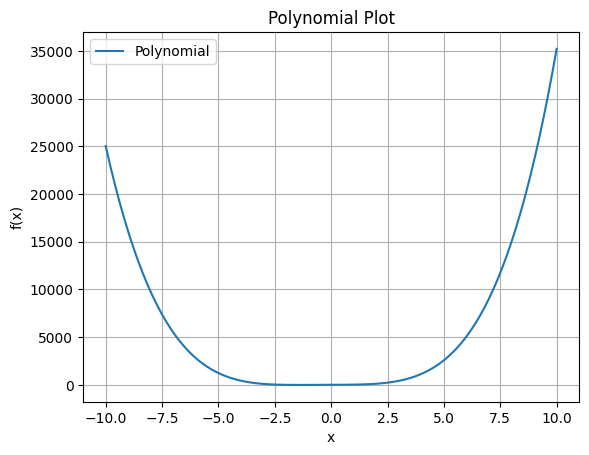

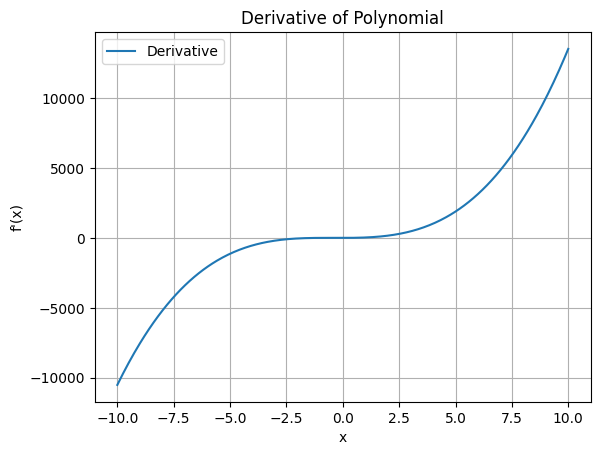

In [27]:
pol= Polynomial(4, [3, 5, 1, 9, 10])
print(pol.evaluate(2))
pol.plot([-10,10])
pol.plot_derivative([-10,10])

## Problem-5

Design a system to model a simple online shopping cart. Create a class `Product` with attributes for `name` and `price`. Then, create a `ShoppingCart` class that has a list to store `Product` objects. Implement methods to `add_item(product)`, `remove_item(product_name)`, and `calculate_total()`.

In [29]:
class Product:
    def __init__(self, name, price):
        if not isinstance(name, str) or not name:
            raise ValueError("Product name must be a non-empty string.")
        if not isinstance(price, (int, float)) or price < 0:
            raise ValueError("Product price must be a non-negative number.")
        
        self.name = name
        self.price = price

    def __repr__(self):
        return f"{self.name} (${self.price})"


class ShoppingCart:
    def __init__(self):
        self.items = []

    def add_item(self, product):
        if not isinstance(product, Product):
            raise TypeError("Only Product instances can be added.")
        self.items.append(product)
        print(f"Added: {product.name}")

    def remove_item(self, product_name):
        for i, product in enumerate(self.items):
            if product.name == product_name:
                removed = self.items.pop(i)
                print(f"Removed: {removed.name}")
                return
        print(f"Product '{product_name}' not found in the cart.")

    def calculate_total(self):
        return sum(product.price for product in self.items)

    def show_cart(self):
        if not self.items:
            print("Shopping cart is empty.")
            return
        print("Items in cart:")
        for item in self.items:
            print(f" - {item.name}: ${item.price}")
        print(f"Total: ${self.calculate_total()}")

In [30]:
p1 = Product("iphone", 56000)
p2 = Product("charger", 350)
p3 = Product("back case", 3400)

In [31]:
cart=ShoppingCart()

In [32]:
cart.add_item(p1)
cart.add_item(p2)
cart.add_item(p3)

Added: iphone
Added: charger
Added: back case


In [33]:
cart.show_cart()

Items in cart:
 - iphone: $56000
 - charger: $350
 - back case: $3400
Total: $59750


In [34]:
final_amount=cart.calculate_total()
print(final_amount)

59750
